# StackOverflow Developer Survey Conclusions

CRISP-DM stands for Cross Industry Process for Data Mining. I will be using this process to explore the survey results for StackOverflow's Developer Survey in 2017. The first step in the CRISP-DM process is understanding what bussiness understanding we can gain from our data, and the second step is understanding the data we have to analyze. Let's take a look and ask ourselves some questions we can answer using this dataset.

## Business Understanding

From this data we can ask some interesting questions. I want to know:
> 1. How common is becoming a developer with a physics background? <br>
> 2. What programming languages should I focus on? <br>
> 3. How should you learn the necessary programming languages? <br>


## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_results = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('datasets_1406_2522_survey_results_schema.csv')

In [3]:
for i in range(len(df_results.columns)):
    print(df_results.columns[i])

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

I will focus my analysis on Canada where this information is important to me entering the field of data science. <br>

Let's look at how much data we have to work on when we filter out all other countries except Canada.

In [4]:
df_country = pd.DataFrame(df_results.Country.value_counts()[:15])
df_country.columns = ['num_resp']
df_country['percentage'] = (df_results.Country.value_counts()[:15] / df_results.Country.value_counts()[:15].sum())
df_country

,num_resp,percentage
United States,11455,0.311938
India,5197,0.141523
United Kingdom,4395,0.119683
Germany,4143,0.112821
Canada,2233,0.060808
France,1740,0.047383
Poland,1290,0.035129
Australia,913,0.024862
Russian Federation,873,0.023773
Spain,864,0.023528


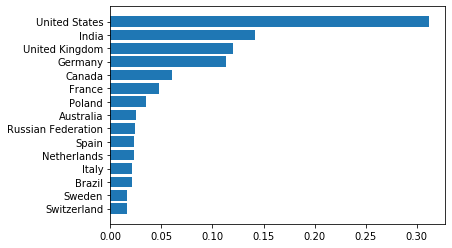

In [5]:
plt.barh(df_country.index, width=df_country.percentage);
plt.gca().invert_yaxis()

## Prepare Data

In [6]:
df_results_can = df_results[df_results['Country'] == 'Canada']
df_results_can.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
11,12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,61,Professional non-developer who sometimes write...,"Yes, I program as a hobby",Canada,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,It's complicated,"10,000 or more employees",...,Strongly disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Disagree,Somewhat agree,Strongly disagree,Strongly agree,NaN,NaN
187,188,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Bachelor's degree,A natural science,Never,"1,000 to 4,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,189,Student,"Yes, both",Canada,"Yes, full-time","Independent contractor, freelancer, or self-em...",Secondary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Strongly disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Disagree,Strongly disagree,Strongly agree,87121.212121,NaN


In [7]:
df_results_can.shape

(2233, 154)

## Data Modelling

### Question #1: How common is becoming a developer with a physics background?

We can see respondents from Canada only make up 6% of the data and there are 2233 entries. From this what can we conlcude about undergradute majors and their importance to becoming a developer?

<b>Analyzing</b>

In [8]:
df_undergrad = pd.DataFrame(df_results_can.MajorUndergrad.value_counts())
df_undergrad.columns = ['num of majors']
entries = df_results_can.shape[0] - df_results_can.MajorUndergrad.isnull().sum()
df_undergrad['percentage'] = df_results_can.MajorUndergrad.value_counts() / entries
df_undergrad

,num of majors,percentage
Computer science or software engineering,960,0.505796
Computer programming or Web development,229,0.120653
Computer engineering or electrical/electronics engineering,216,0.113804
A natural science,77,0.040569
A non-computer-focused engineering discipline,65,0.034247
Mathematics or statistics,62,0.032666
"Information technology, networking, or system administration",58,0.030558
Something else,46,0.024236
A business discipline,40,0.021075
A humanities discipline,35,0.018440


<b>Visualizing</b>

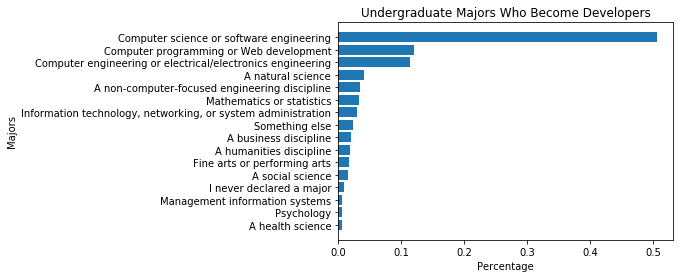

In [9]:
plt.barh(df_undergrad.index, df_undergrad.percentage);
plt.gca().invert_yaxis()
plt.title('Undergraduate Majors Who Become Developers')
plt.xlabel('Percentage')
plt.ylabel('Majors');

It is evident with only 4% of respondents having a background in natural science that it is uncommon to become a developer without an undergraduate degree in: computer science or software engineering, computer programming or Web development, or computer engineering or electrical/electronics engineering. These three categories had a combined representation of 74%.

### Question #2: What programming languages should you focus on?

There are a total of 34 languages developer respondednts have said they worked with, but which is most popular? The answer would be important to know what languages companies need to support their business.

<b>Analyzing</b>

In [29]:
def counter_column(df, column, new_column):
    """
    Returns value counts for a column where rows have a list of ; seperated values
    
    df - dataframe which contains the data
    
    column - the column which contains the nested lists
    
    new_column -  the column name you want for the unique values of items in the nested lists
    
    """
    # splits values of column
    df_copy = df
    df_copy = df_copy[column].dropna()
    df_copy = df_copy.apply(lambda x: x.split(';'))
    
    # counts unique values of nested list
    temp = []
    for row in df_copy:
        for item in row:
            temp.append(item.strip())
    temp = [[x,temp.count(x)] for x in set(temp)]
    
    # creates a dataframe of counts and percentages for desired column
    df_new = pd.DataFrame(temp)
    df_new.columns = [new_column, 'counts']
    df_new['percentage'] = df_new.counts / df_new.counts.sum()
    df_new = df_new.sort_values(by = 'percentage', ascending = False)
    
    return df_new

In [23]:
counter_column(df_results_can, 'HaveWorkedLanguage', 'languages')[:10]

,languages,counts,percentage
21,JavaScript,1104,0.165220
22,SQL,872,0.130500
18,C#,647,0.096827
34,Python,620,0.092787
25,Java,613,0.091739
9,PHP,424,0.063454
14,C++,407,0.060910
16,C,308,0.046094
23,TypeScript,176,0.026339
19,Ruby,174,0.026040


In [24]:
langs = counter_column(df_results_can, 'HaveWorkedLanguage', 'languages')[:10]

<b>Visualizing</b>

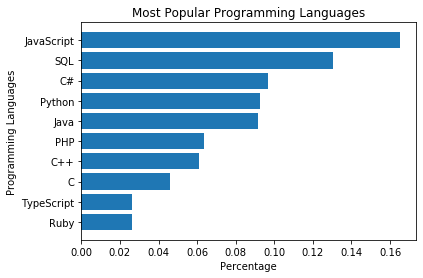

In [25]:
plt.barh(langs.languages ,langs.percentage);
plt.gca().invert_yaxis()
plt.title('Most Popular Programming Languages')
plt.xlabel('Percentage')
plt.ylabel('Programming Languages');

The top 4 programming languages make up approximately 48% of languages developers have worked with. Understanding these 4 would prepare you for nearly half of all jobs.

### Question #3: How should you learn the necessary programming languages?

There are a number of different ways to learn, from universities, online educators, books, etc. So which is the best method to prepare yourself for a job?

<b>Analyzing</b>

In [26]:
counter_column(df_results_can, 'CousinEducation', 'methods')

,methods,counts,percentage
2,Take online courses,608,0.196256
5,Buy books and work through the exercises,426,0.137508
4,Return to college,375,0.121046
12,Part-time/evening courses,336,0.108457
10,Contribute to open source,322,0.103938
6,Bootcamp,214,0.069077
1,Conferences/meet-ups,213,0.068754
9,Get a job as a QA tester,153,0.049387
8,Participate in hackathons,134,0.043254
3,Participate in online coding competitions,113,0.036475


In [27]:
edu_methods = counter_column(df_results_can, 'CousinEducation', 'methods')

<b>Visualizing</b>

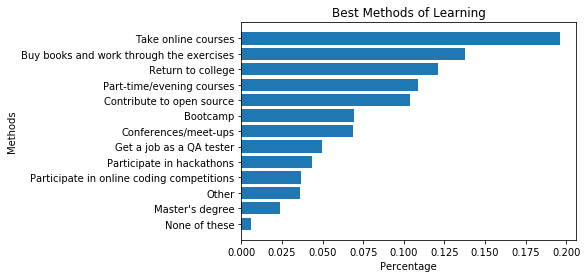

In [28]:
plt.barh(edu_methods.methods, edu_methods.percentage);
plt.gca().invert_yaxis()
plt.title('Best Methods of Learning')
plt.xlabel('Percentage')
plt.ylabel('Methods');

From this data we can see that the highest recommendation is taking online courses to build your skills to prepare yourself to get a job. If we combine the take online courses, buy books and work through exercises, part time/evening courses, and bootcamp they make up 51% of the suggested methods. They also all have in common that they can  be done in free time or after work.